<a href="https://colab.research.google.com/github/cyberpunk-newman/Master/blob/main/BS6204/Lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [ ]:
# load MNIST dataset
data = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# data ->(train,test)
# train -> (X,y) X is image, y is label
# test ->(X,y)


60000

In [ ]:
# get the first image from x
first_image = data[0][0][0]

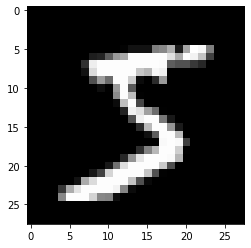

In [ ]:
plt.imshow(first_image,cmap = 'gray')

In [ ]:
first_image.shape

(28, 28)

In [ ]:
# RGB - 3 channels
num_classes = 10
input_shape = (28,28,1)

In [ ]:
# split the date into train and test
(X_train,y_train),(X_test,y_test) = data

In [ ]:
# data=((60000,28,28),(60000,)),((10000,28,28),(10000,))
X_train.shape

(60000, 28, 28)

In [ ]:
# prepare our image
# image data should ideally be between 0-1
# normalize the image first before training
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# reshape array
# our input is (28,28,1)
# (60000,28,28) -> (60000,28,28,1) add a channel information
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# [5,0,4,...,5,6,8] -> [[0,0,0,0,0,0,1,0,0,0...]]

y_train = keras.utils.to_categorical(y_train,num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test,num_classes)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential(
  [
   keras.Input(shape = input_shape), # input_shape = (28,28,1)
   layers.Conv2D(32,kernel_size = (3,3),activation='relu'),
   layers.MaxPool2D(pool_size=(2,2)),
   layers.Conv2D(64,kernel_size=(3,3)),
   layers.MaxPooling2D(pool_size=(2,2)),
   layers.Flatten(),
   layers.Dropout(0.5), #removes random neruons to reduce overfitting
   layers.Dense(num_classes,activation='softmax')  # output layer
  ]

)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [ ]:
# cross-Entropy
batch_size = 128  # multiples of 2 
epochs=20

model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy'])

history = model.fit(X_train,y_train,batch_size=batch_size,epochs = epochs,validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 33s 10ms/step - loss: 0.3605 - accuracy: 0.8935 - val_loss: 0.0957 - val_accuracy: 0.9752
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1180 - accuracy: 0.9644 - val_loss: 0.0751 - val_accuracy: 0.9800
Epoch 3/20
422/422 [==============================] - 4s 8ms/step - loss: 0.0874 - accuracy: 0.9726 - val_loss: 0.0541 - val_accuracy: 0.9855
Epoch 4/20
422/422 [==============================] - 4s 8ms/step - loss: 0.0767 - accuracy: 0.9762 - val_loss: 0.0502 - val_accuracy: 0.9865
Epoch 5/20
422/422 [==============================] - 4s 8ms/step - loss: 0.0678 - accuracy: 0.9793 - val_loss: 0.0501 - val_accuracy: 0.9860
Epoch 6/20
422/422 [==============================] - 4s 8ms/step - loss: 0.0624 - accuracy: 0.9803 - val_loss: 0.0441 - val_accuracy: 0.9882
Epoch 7/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0433 - val_accuracy: 0.9883
Epoc

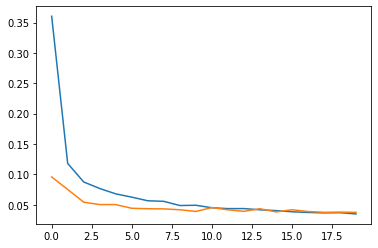

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

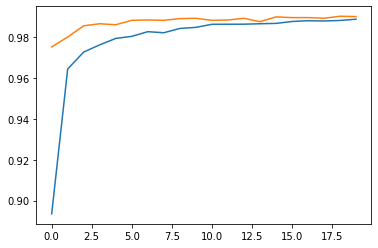

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

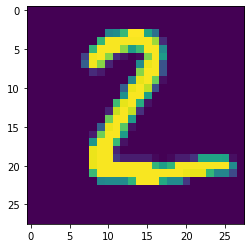

In [ ]:
plt.imshow(X_test[1].reshape(28,28))

In [ ]:
X_test[1].shape

(28, 28, 1)

In [ ]:
# model prediction takes in (num_images,height,width,channel)
# perform prediction
model.predict(X_test[1].reshape(1,28,28,1)).argmax() # get index of highest value

array([[1.3087860e-06, 9.2648708e-07, 9.9999714e-01, 2.0662029e-08,
        4.1053194e-12, 8.9348485e-12, 6.4066552e-07, 3.1835342e-12,
        5.5986813e-08, 4.5809963e-11]], dtype=float32)

In [ ]:
import cv2 as cv
from skimage import io

num6='/content/6.png'

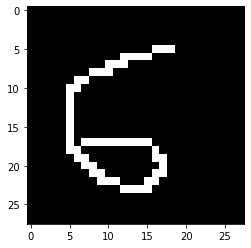

In [ ]:
plt.imshow(io.imread(num6))

In [ ]:
six = io.imread(num6,as_gray=True)

In [ ]:
model.predict(six.reshape(1,28,28,1)).argmax()

5